In [421]:
import numpy as np
import matplotlib.pyplot as plt

# 2: Problem Formulation

"We consider the special case where r is constant. (What if r is not constant?)
The problem is then to compute
$$
\frac{V_{t_0}(S_{t_0})}{B_{t_0}} = \max_{\tau}(\mathbb{E}\frac{h(S_\tau)}{B_\tau})."
$$

In [422]:
from DiscretizationSchemes import discretizationScheme, StockpriceGBM # consider different discretization schemes?
from intrinsicOptionValues import call, put # consider more payoffs?


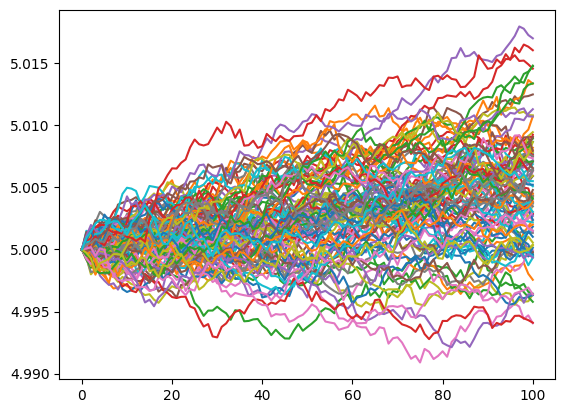

In [423]:
# check discretizationscheme
mu = 0.001
sigma = 0.01
start_price = 5
times = np.linspace(0,1,101) # monitoring dates
N = 100
for i in range(N):
    plt.plot(discretizationScheme(times, start_price, mu, sigma))

### Lokeshwar, p4: Optimization problem (1)

In [424]:
from scipy import optimize

In [425]:
# compute for a call with strike K=6
K = 5
def h(S_T):
    return call(S_T,K)

# "Generate Stm (n) for paths n = 1,...,N, m = 0,...,M"
S0, mu, sigma = 5, 0.001, 0.01
r = 0.01 # constant risk free rate
T=1
M = 52
monitoring_dates = np.linspace(0,T,M) # does not have to be evenly spaced
N = 100
sampleS = []
for i in range(N):
    sampleS.append(discretizationScheme(monitoring_dates, S0, mu, sigma))
sampleS = np.matrix(sampleS)

# "Evaluate final time option value for each path."
sampleV = []
for i in range(N):
    S_T = sampleS[i,-1]
    sampleV.append(max(h(S_T),0))

# Initialize βtM from uniform distribution.
d = 1 # in this case the Markovian process is a single stock price
p = 10 # number of neurons, see Hornik et al for a reasonable value
Np = p*d + p + p + 1
betas = np.zeros((M,Np))
betas[M-1] = np.random.uniform(0,1,Np) # ReLU only learns from positive values

def G(beta,S_t):
    A1S_T = S_t * beta[:p] + beta[p:p+p]
    phiA1S_T = np.maximum(A1S_T, np.zeros_like(A1S_T))
    W2 = np.array([beta[p+p:p+p+p]])
    A2phiA1S_T = np.dot(W2,phiA1S_T.transpose()) + beta[p+p+p]
    psiA2phiA1S_T = A2phiA1S_T
    return psiA2phiA1S_T[0] # [0,0]?

def Expectation_G_given_Stminus1(beta,Stminus1,N):
  avgG = 0
  for n in range(N):
    St = StockpriceGBM(1/N, Stminus1, mu, sigma)
    avgG += G(beta, St) / N
  return avgG

def target(beta, S_t, V_t):
    return (1/N) * sum([(V_t[n] - G(beta, S_t[n]))**2 for n in range(N)])

# Regress later
for i in range(M-1, 0, -1):
  print(i)
  # fit the network
  fit = optimize.minimize(target, x0=betas[i,:], args=(sampleS[:,i], sampleV[:])) # specify method?
  if fit.success:
      betas[i-1] = fit.x
  else:
      print(fit.message)

  # estimate continuation value Qti(n), get estimated option value Vti(n)
  for n in range(N):
    Btiminus1 = np.exp(-r*T/N)
    Qtiminus1 = Btiminus1 * Expectation_G_given_Stminus1(betas[i-1,:], sampleS[n,i-1], 100)
    if h(sampleS[n,i-1]) > Qtiminus1:
      print("a")




51
Desired error not necessarily achieved due to precision loss.
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
50
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
49
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
48
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
47
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
46
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
45
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
44
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
43
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
42
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
41
a
a
a
a
a
a
a
a
a
a
a

In [426]:
beta = np.zeros(5)
beta[0:2]
beta[2:4]

array([0., 0.])

In [427]:
holdValues = np.zeros(len(times)-1)
